Mounted at /content/drive
Aperçu des données:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Nombre de valeurs manquantes après remplacement des zéros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Vérification des valeurs manquantes après imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-1-3119050913.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


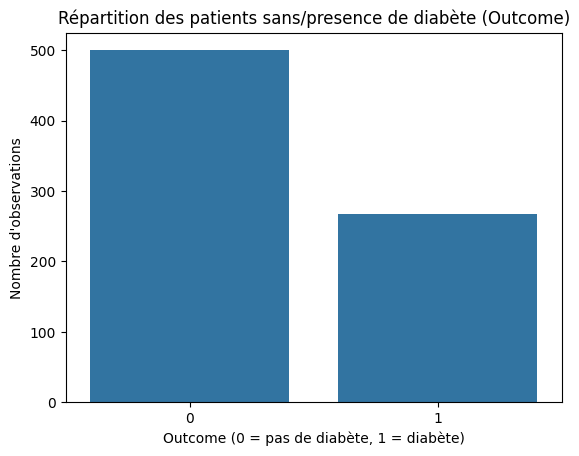


Statistiques descriptives par classe Outcome:


Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]


Taille des datasets : Train=460, Validation=154, Test=154

Distribution des classes avant SMOTE :
Outcome
0    299
1    161
Name: count, dtype: int64

Distribution des classes après SMOTE :
Outcome
1    299
0    299
Name: count, dtype: int64

Évaluation sur validation:
Accuracy : 0.7987
Precision : 0.6885
Recall : 0.7778
F1-score : 0.7304

Rapport de classification sur test set:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       101
           1       0.57      0.70      0.63        53

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



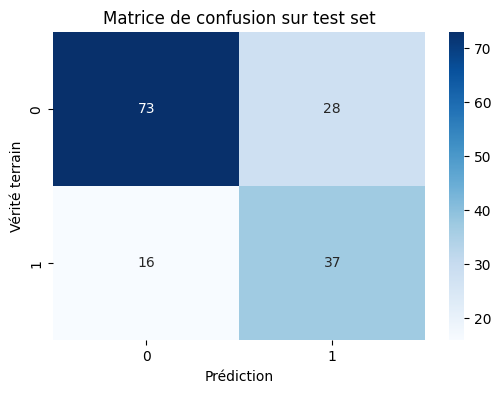

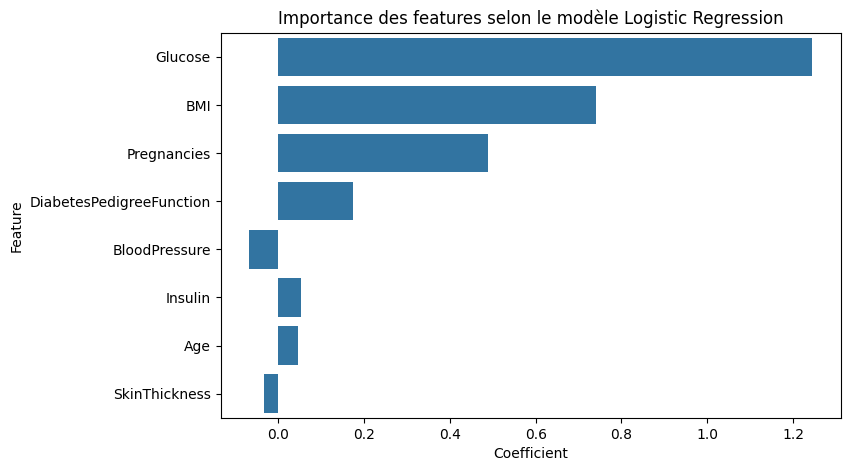


Nombre de faux positifs : 28
Nombre de faux négatifs : 16

Conclusion:
Le modèle de régression logistique, entraîné sur un jeu de données équilibré via SMOTE, 
présente une performance correcte sur le jeu de validation et de test.
Les principales variables influençant la prédiction sont celles avec les plus grands coefficients.
Il est recommandé d’améliorer la collecte de données, d’essayer d’autres modèles plus complexes, 
et de surveiller le déséquilibre des classes pour une meilleure généralisation.



In [1]:
# Partie C – Classification : Prédiction du diabète avec Pima Indians Diabetes Dataset

# 1. Monter Google Drive pour accéder au dataset
from google.colab import drive
drive.mount('/content/drive')

# 2. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE

%matplotlib inline

# 3. Charger le dataset depuis Google Drive
# Remplace le chemin ci-dessous par le chemin exact de ton fichier diabetes.csv dans ton Drive
file_path = '/content/drive/MyDrive/TP_ML/diabetes.csv'

df = pd.read_csv(file_path)

print("Aperçu des données:")
display(df.head())

# 4. Nettoyage et prétraitement

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

print("\nNombre de valeurs manquantes après remplacement des zéros:")
print(df.isnull().sum())

for col in cols_with_zeros:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

print("\nVérification des valeurs manquantes après imputation:")
print(df.isnull().sum())

# 5. Analyse exploratoire et déséquilibre

sns.countplot(x='Outcome', data=df)
plt.title("Répartition des patients sans/presence de diabète (Outcome)")
plt.xlabel("Outcome (0 = pas de diabète, 1 = diabète)")
plt.ylabel("Nombre d'observations")
plt.show()

print("\nStatistiques descriptives par classe Outcome:")
display(df.groupby('Outcome').describe().T)

# 6. Séparation train / validation / test

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"\nTaille des datasets : Train={len(X_train)}, Validation={len(X_val)}, Test={len(X_test)}")

# 7. Standardisation

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 8. Gestion du déséquilibre avec SMOTE

print("\nDistribution des classes avant SMOTE :")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribution des classes après SMOTE :")
print(pd.Series(y_train_res).value_counts())

# 9. Modélisation : Logistic Regression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_res, y_train_res)

# Prédiction sur validation
y_val_pred = model.predict(X_val_scaled)

print("\nÉvaluation sur validation:")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision : {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall : {recall_score(y_val, y_val_pred):.4f}")
print(f"F1-score : {f1_score(y_val, y_val_pred):.4f}")

# 10. Évaluation finale sur test set

y_test_pred = model.predict(X_test_scaled)

print("\nRapport de classification sur test set:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion sur test set")
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.show()

# 11. Importance des features (coefficients)

features = X.columns
coef = model.coef_[0]
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Importance des features selon le modèle Logistic Regression")
plt.show()

# 12. Analyse des erreurs (faux positifs / faux négatifs)

test_results = pd.DataFrame(X_test, columns=features)
test_results['y_true'] = y_test.values
test_results['y_pred'] = y_test_pred

false_positives = test_results[(test_results['y_true'] == 0) & (test_results['y_pred'] == 1)]
false_negatives = test_results[(test_results['y_true'] == 1) & (test_results['y_pred'] == 0)]

print(f"\nNombre de faux positifs : {len(false_positives)}")
print(f"Nombre de faux négatifs : {len(false_negatives)}")

# 13. Conclusion synthétique

print("""
Conclusion:
Le modèle de régression logistique, entraîné sur un jeu de données équilibré via SMOTE,
présente une performance correcte sur le jeu de validation et de test.
Les principales variables influençant la prédiction sont celles avec les plus grands coefficients.
Il est recommandé d’améliorer la collecte de données, d’essayer d’autres modèles plus complexes,
et de surveiller le déséquilibre des classes pour une meilleure généralisation.
""")
